In [20]:
pip install pandas matplotlib seaborn nltk textblob wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


              Reviewer Name  \
0            Amrit Krishnan   
1           Sandra Sugathan   
2                  Shibu AS   
3                  Malavika   
4  Sreelakshmi. P Sreekutty   

                                              Review      Period  \
0                       Kidulan class by jilo jose ,  3 days ago   
1                         Good and informative class  3 days ago   
2                              Excellent very useful  3 days ago   
3                                               Good  3 days ago   
4  It was a very good experience.\nThanks for giv...  3 days ago   

                              Company        Date  Rating Rating Sentiment  \
0  TechnoMaster Internship & Training  08-04-2025       5         Positive   
1  TechnoMaster Internship & Training  08-04-2025       5         Positive   
2  TechnoMaster Internship & Training  08-04-2025       5         Positive   
3  TechnoMaster Internship & Training  08-04-2025       5         Positive   
4  TechnoMaste

<ipython-input-21-8dde547dbaaa>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


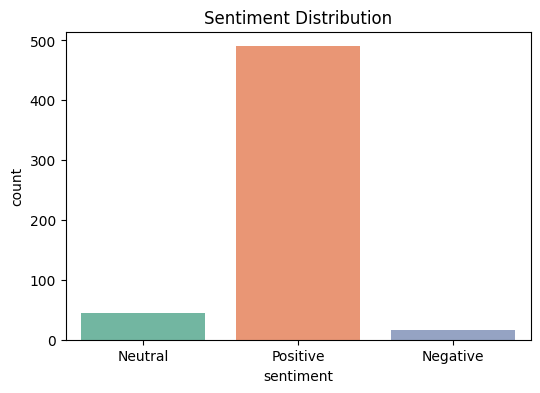

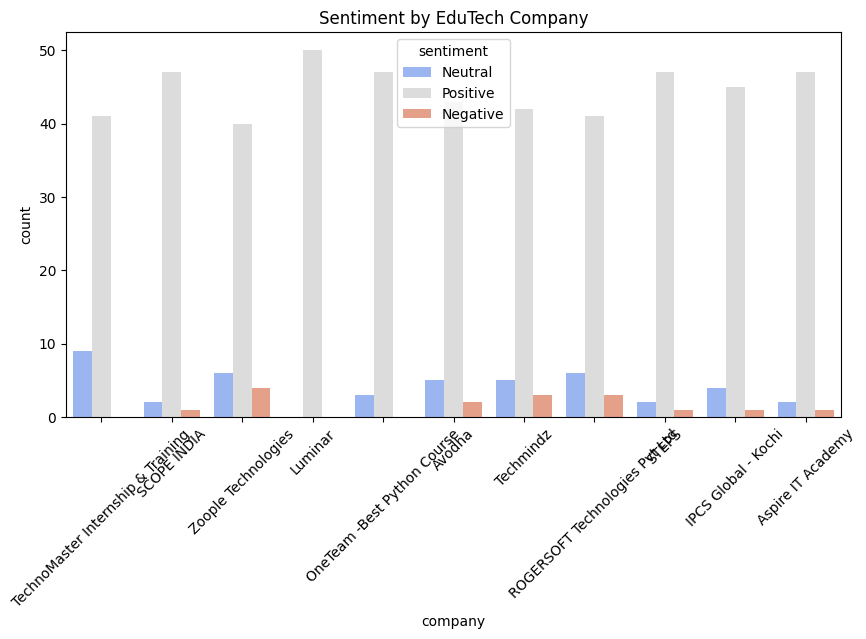

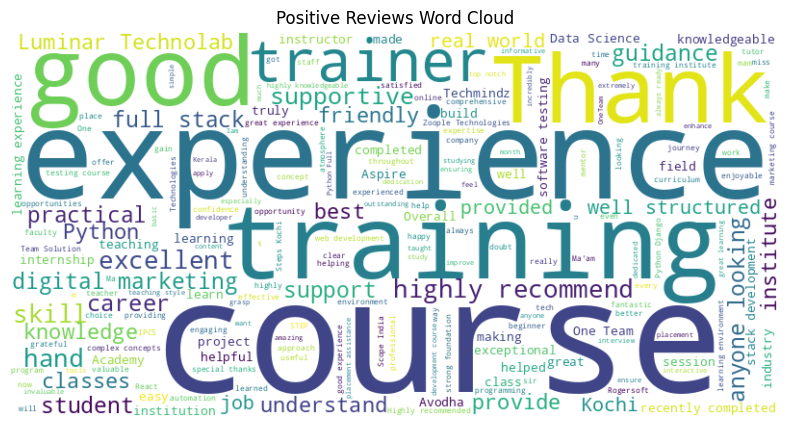

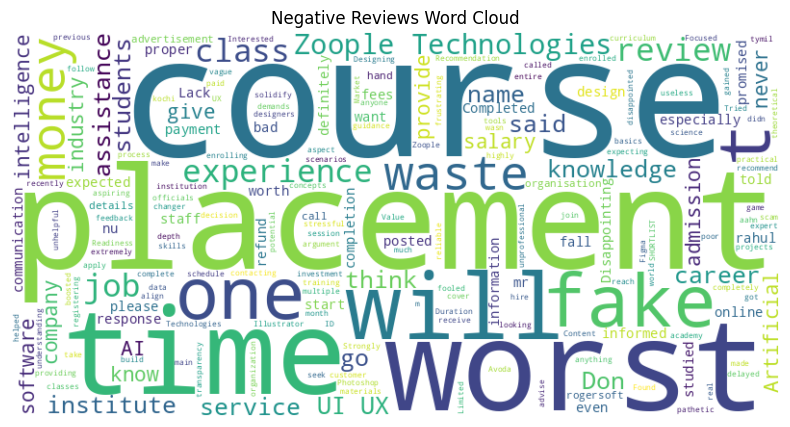

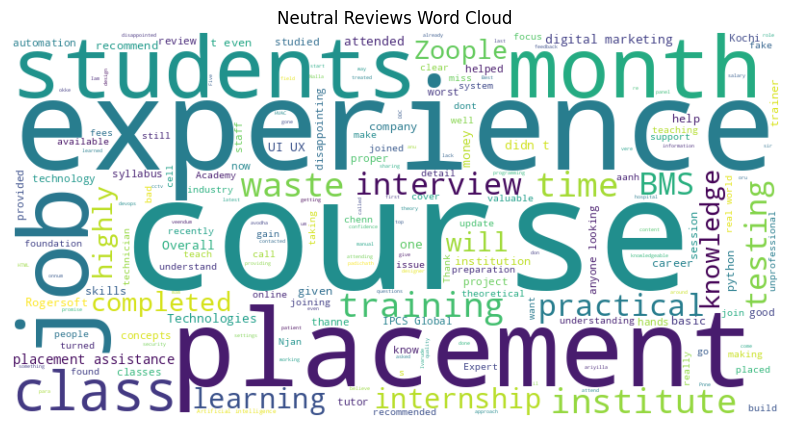

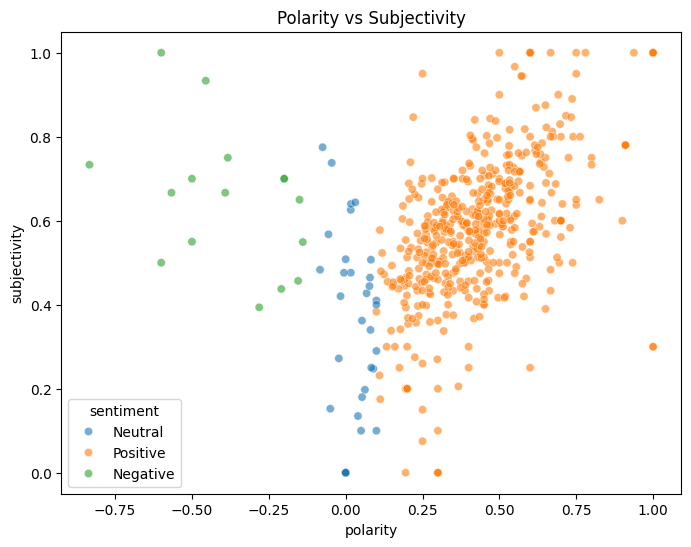

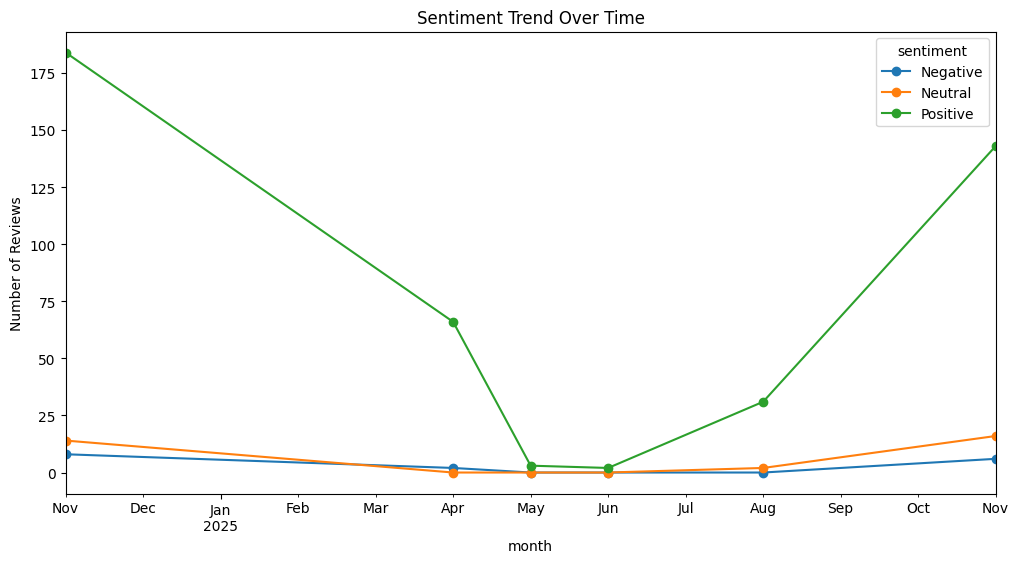

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
nltk.download('punkt')

# Load your dataset (with robust encoding)
df = pd.read_csv('kochi_edutech_reviews_new.csv', encoding='ISO-8859-1')  # Adjust if needed

# Inspect
print(df.head())
print(df.columns)

# Rename or standardize column names if needed
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# Drop missing or empty reviews
df.dropna(subset=['review'], inplace=True)
df = df[df['review'].str.strip() != '']

# Sentiment analysis with TextBlob
df['polarity'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Categorize sentiment
def get_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(get_sentiment)

# 🔍 EDA Visualizations

# 1. Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.show()

# 2. Company-wise sentiment (if company column exists)
if 'company' in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='company', hue='sentiment', palette='coolwarm')
    plt.title('Sentiment by EduTech Company')
    plt.xticks(rotation=45)
    plt.show()

# 3. WordClouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(df[df['sentiment'] == sentiment]['review'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{sentiment} Reviews Word Cloud')
    plt.show()

# 4. Scatterplot of polarity vs subjectivity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='polarity', y='subjectivity', hue='sentiment', data=df, alpha=0.6)
plt.title('Polarity vs Subjectivity')
plt.show()

# 5. Optional: Sentiment trend over time (if 'date' column exists)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date'], inplace=True)
    df['month'] = df['date'].dt.to_period('M')

    monthly_sentiment = df.groupby(['month', 'sentiment']).size().unstack().fillna(0)
    monthly_sentiment.plot(kind='line', figsize=(12, 6), marker='o')
    plt.title('Sentiment Trend Over Time')
    plt.ylabel('Number of Reviews')
    plt.show()